In [11]:
# !wget https://raw.githubusercontent.com/JaviCeRodriguez/IAA_tpfinal/main/datasets/tracks_audio_features.csv

--2023-06-08 17:56:10--  https://raw.githubusercontent.com/JaviCeRodriguez/IAA_tpfinal/main/datasets/tracks_audio_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21694815 (21M) [text/plain]
Saving to: ‘tracks_audio_features.csv.1’

tracks_audio_featur 100%[===================>]  20.69M   111MB/s    in 0.2s    

2023-06-08 17:56:11 (111 MB/s) - ‘tracks_audio_features.csv.1’ saved [21694815/21694815]



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
songs = pd.read_csv('./datasets/tracks_audio_features.csv')

Por el minado de datos, cuando una misma cancion aparece en distintas playlist (del mismo u otro genero), le guardamos cada genero en un string separado por comas.
Antes de hacer cualquier analisis, queremos ver cuantas canciones son las multiclase para evaluar que hacer con ellas (elegir un genero, eliminarlas, etc.)

In [4]:
multi_g = 0 #canciones multigenero
for song in songs.genre:
  genres = list(set(song.split(',')))
  if len(genres)>1:
    multi_g += 1
print(multi_g)

9720


In [5]:
print(songs.shape[0], songs.shape[0] - multi_g, multi_g/songs.shape[0]*100)

67288 57568 14.445369159434074


De las 67288 canciones, 9720 son multigenero. Para la simplificacion de este analisis vamos a descartarlas y quedarnos con las 57568 restantes.

In [6]:
def es_multi_genero(song):
  return len(set(song['genre'].split(','))) >1 

In [7]:
songs_sin_multi=songs.drop(songs[songs.apply(lambda x: es_multi_genero(x), axis=1)].index)

In [8]:
print(songs.shape, songs_sin_multi.shape)

(67288, 21) (57568, 21)


Ahora limpiamos los que tienen el mismo genero repetido

In [9]:
songs_sin_multi['genre'] = songs_sin_multi.genre.apply(lambda x: ''.join(set(x.split(','))) )

In [10]:
songs_sin_multi.genre.value_counts(normalize=True)

genre
ambient       0.015356
comedy        0.013688
jazz          0.013514
gospel        0.013514
sleep         0.013480
                ...   
electronic    0.002727
punk-rock     0.002658
reggaeton     0.002467
metal         0.002276
dubstep       0.000504
Name: proportion, Length: 126, dtype: float64

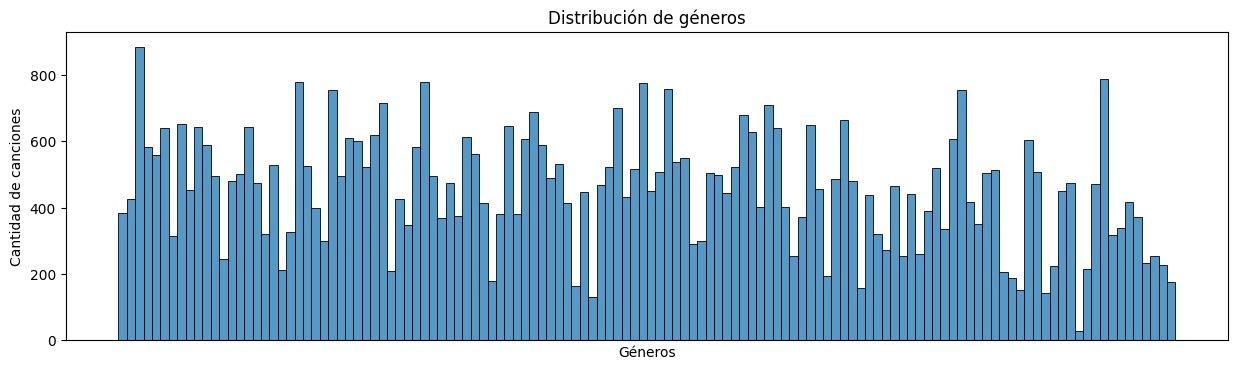

In [33]:
plt.figure(figsize=(15, 4))
sns.histplot(
    songs_sin_multi.genre,
    bins=127
)
plt.title('Distribución de géneros')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de canciones')
plt.xticks([]);

In [37]:
songs_sin_multi.genre.value_counts().loc[lambda x: x>200].to_frame()

,count
genre,
ambient,884
comedy,788
jazz,778
gospel,778
sleep,776
...,...
party,225
latino,214
summer,213


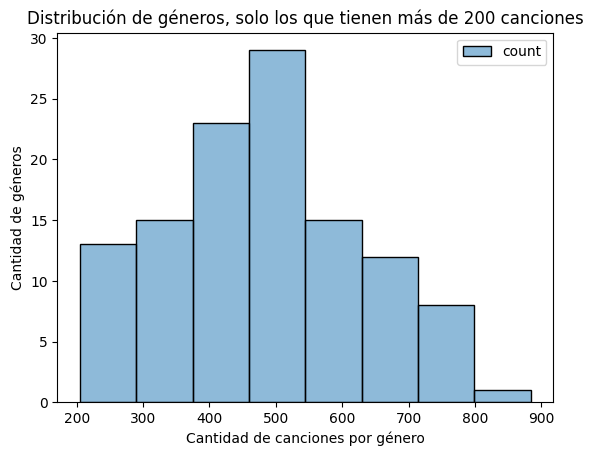

In [36]:
sns.histplot(songs_sin_multi.genre.value_counts().loc[lambda x: x>200].to_frame())
plt.title('Distribución de géneros, solo los que tienen más de 200 canciones')
plt.xlabel('Cantidad de canciones por género')
plt.ylabel('Cantidad de géneros');

In [38]:
songs_sin_multi[songs_sin_multi['genre'] == 'comedy'] # Raro que haya tantas canciones de comedia, pero bueno

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
537,03qmvWJwZ1aq61fi0SxcWl,White,6sBRZWeLnwR1wJX5cMqXzX,comedy,0.488,0.9520,7,-5.945,1,0.9590,...,0.000000,0.864,0.194,67.384,audio_features,spotify:track:03qmvWJwZ1aq61fi0SxcWl,https://api.spotify.com/v1/tracks/03qmvWJwZ1aq...,https://api.spotify.com/v1/audio-analysis/03qm...,425664,4
541,03roQ537Kwv96k4OBM7Q0x,Exaggerating GF / Bachelor,2YKtEDbwxF5VnyE6TFsZKO,comedy,0.596,0.9260,2,-5.193,1,0.8540,...,0.000000,0.931,0.572,83.261,audio_features,spotify:track:03roQ537Kwv96k4OBM7Q0x,https://api.spotify.com/v1/tracks/03roQ537Kwv9...,https://api.spotify.com/v1/audio-analysis/03ro...,125000,4
677,04xlyBUS1A26V87YnnizRH,The Worst Possible Conclusion,21gBiM2aryQ7OIfHKc5Cy2,comedy,0.540,0.7770,1,-10.009,0,0.9370,...,0.000000,0.926,0.287,83.552,audio_features,spotify:track:04xlyBUS1A26V87YnnizRH,https://api.spotify.com/v1/tracks/04xlyBUS1A26...,https://api.spotify.com/v1/audio-analysis/04xl...,265653,3
707,05DfXWTcLpyg8IrcnErPC8,Ho,49Lz8u4Ta9t2hmuqMmVU0C,comedy,0.699,0.4690,7,-15.921,1,0.9130,...,0.000000,0.712,0.622,107.912,audio_features,spotify:track:05DfXWTcLpyg8IrcnErPC8,https://api.spotify.com/v1/tracks/05DfXWTcLpyg...,https://api.spotify.com/v1/audio-analysis/05Df...,111433,4
723,05HBNZ0fL8AclM3HCapZ8X,The Hierarchy of Cookies,3AhqN3WcKmO27acMgjLIse,comedy,0.447,0.8780,5,-5.839,1,0.9330,...,0.000000,0.970,0.493,71.135,audio_features,spotify:track:05HBNZ0fL8AclM3HCapZ8X,https://api.spotify.com/v1/tracks/05HBNZ0fL8Ac...,https://api.spotify.com/v1/audio-analysis/05HB...,802040,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66944,7xkzwitmVarNh4hnNcyQW8,Annoying Couples,00gep1scHEucHEWseySLZm,comedy,0.576,0.8560,4,-6.830,1,0.9190,...,0.000000,0.923,0.339,136.273,audio_features,spotify:track:7xkzwitmVarNh4hnNcyQW8,https://api.spotify.com/v1/tracks/7xkzwitmVarN...,https://api.spotify.com/v1/audio-analysis/7xkz...,231248,3
67032,7yJBnDj8oh7FH6QzPzapJ6,That's Show Biz - 1966/Live At Upstairs At The...,0LhqqvjRKycWOvYwXnrKsK,comedy,0.524,0.5960,10,-17.293,0,0.9070,...,0.000035,0.713,0.601,106.953,audio_features,spotify:track:7yJBnDj8oh7FH6QzPzapJ6,https://api.spotify.com/v1/tracks/7yJBnDj8oh7F...,https://api.spotify.com/v1/audio-analysis/7yJB...,244587,4
67048,7yOQmEyeOhYFxWsWMKAi7m,Gitarren Spielt Auf,2mMOsGqdnS1MiK8TOOjTgU,comedy,0.524,0.0956,8,-21.814,1,0.0524,...,0.000026,0.112,0.450,128.698,audio_features,spotify:track:7yOQmEyeOhYFxWsWMKAi7m,https://api.spotify.com/v1/tracks/7yOQmEyeOhYF...,https://api.spotify.com/v1/audio-analysis/7yOQ...,196715,4
67114,7ysL0EOs7BdacnT0ucOtuA,Buddy System,00Xqzs3z7pH9UkxxH9F24g,comedy,0.675,0.6080,1,-13.468,0,0.9580,...,0.000000,0.687,0.657,98.987,audio_features,spotify:track:7ysL0EOs7BdacnT0ucOtuA,https://api.spotify.com/v1/tracks/7ysL0EOs7Bda...,https://api.spotify.com/v1/audio-analysis/7ysL...,92995,1


In [40]:
# Elegimos los géneros que nos interesan para el análisis y el entrenamiento del modelo
genres_seeds = [
    "acoustic", "alt-rock", "alternative", "ambient", "blues", "bossanova", "chill", "classical", "country", 
    "disco", "edm", "folk", "forro", "funk", "gospel", "grunge", "heavy-metal", "hip-hop", "house","indie", 
    "jazz", "k-pop","latino", "metal", "opera", "pop", "punk","r-n-b","reggae", "reggaeton", "rock",
    "rockabilly", "salsa", "sertanejo", "ska", "soul", "tango", "techno"
]
len(genres_seeds)

38

In [41]:
tracks_selected = songs[songs['genre'].isin(genres_seeds)]

In [42]:
tracks_selected.genre.value_counts().to_frame()

,count
genre,
ambient,852
gospel,722
r-n-b,697
jazz,680
rockabilly,607
blues,575
classical,572
salsa,489
acoustic,486


In [43]:
tracks_selected.head(10)

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
3,000xQBsBOXGbHzbOwWsTua,Harmony in Blue I,1U5x6wQtMJtbwM3NZRSvKT,ambient,0.182,0.0513,8,-27.039,0,0.0415,...,0.810000,0.0900,0.0879,73.481,audio_features,spotify:track:000xQBsBOXGbHzbOwWsTua,https://api.spotify.com/v1/tracks/000xQBsBOXGb...,https://api.spotify.com/v1/audio-analysis/000x...,91827,5
14,005PrMKAhDjR0cUSMYmdYH,Miradas de Amor,7jOrFMu39xWwTIKvhGwlDj,rockabilly,0.544,0.5510,5,-8.175,1,0.0327,...,0.892000,0.0776,0.8970,136.299,audio_features,spotify:track:005PrMKAhDjR0cUSMYmdYH,https://api.spotify.com/v1/tracks/005PrMKAhDjR...,https://api.spotify.com/v1/audio-analysis/005P...,178107,4
18,007kRcQoBb4BN9GywpeJAa,Solo,0nZn0G4LOzU6G4ProRExYy,rock,0.612,0.9410,10,-6.153,0,0.0444,...,0.000335,0.0973,0.7740,120.064,audio_features,spotify:track:007kRcQoBb4BN9GywpeJAa,https://api.spotify.com/v1/tracks/007kRcQoBb4B...,https://api.spotify.com/v1/audio-analysis/007k...,174048,4
23,009yAC1axMJkhvYFgkB3nA,Nirvana,4HFhThwYfigGXrIot0zUfl,house,0.758,0.6940,0,-4.922,1,0.0453,...,0.000000,0.0566,0.4280,117.969,audio_features,spotify:track:009yAC1axMJkhvYFgkB3nA,https://api.spotify.com/v1/tracks/009yAC1axMJk...,https://api.spotify.com/v1/audio-analysis/009y...,157910,4
27,00CAvPIbaOTN0dJAEC0fsT,Your Great Name,2VFvahahHbaC4rgqnVvnlw,gospel,0.539,0.8690,10,-5.266,1,0.0467,...,0.000008,0.3610,0.2840,103.020,audio_features,spotify:track:00CAvPIbaOTN0dJAEC0fsT,https://api.spotify.com/v1/tracks/00CAvPIbaOTN...,https://api.spotify.com/v1/audio-analysis/00CA...,379563,4
32,00F7KL6HIWNJNfQwszn7uI,Shocks of Mighty,0i63dNBqSVyqhyPTDum0Rg,reggae,0.900,0.6750,2,-8.139,1,0.0896,...,0.465000,0.1950,0.4370,108.666,audio_features,spotify:track:00F7KL6HIWNJNfQwszn7uI,https://api.spotify.com/v1/tracks/00F7KL6HIWNJ...,https://api.spotify.com/v1/audio-analysis/00F7...,171053,4
33,00FKD8czz1yiSufNQJYFf8,feels familiar,5yvx3iaU8vZXA2t6kT1Ao6,ambient,0.314,0.2600,0,-15.650,1,0.0339,...,0.805000,0.1950,0.2340,84.935,audio_features,spotify:track:00FKD8czz1yiSufNQJYFf8,https://api.spotify.com/v1/tracks/00FKD8czz1yi...,https://api.spotify.com/v1/audio-analysis/00FK...,127032,4
35,00FROhC5g4iJdax5US8jRr,Satisfy You,2dHr0LpUe6CNV5lNsr8x0W,r-n-b,0.764,0.5940,6,-10.050,1,0.1850,...,0.000000,0.1450,0.6950,87.261,audio_features,spotify:track:00FROhC5g4iJdax5US8jRr,https://api.spotify.com/v1/tracks/00FROhC5g4iJ...,https://api.spotify.com/v1/audio-analysis/00FR...,286441,4
42,00Ja20eonXSXD5vB3Qgqmo,Deep Conversations,4NExICdPBjSJZg8Tx0xyKm,alternative,0.782,0.7570,1,-4.977,0,0.0632,...,0.000740,0.0731,0.8890,89.991,audio_features,spotify:track:00Ja20eonXSXD5vB3Qgqmo,https://api.spotify.com/v1/tracks/00Ja20eonXSX...,https://api.spotify.com/v1/audio-analysis/00Ja...,146871,4
48,00LfFm08VWeZwB0Zlm24AT,Suga Suga,2bAkYizbM1rMbOUHpfAV9z,r-n-b,0.662,0.7480,5,-3.041,0,0.2680,...,0.000008,0.0841,0.5350,82.331,audio_features,spotify:track:00LfFm08VWeZwB0Zlm24AT,https://api.spotify.com/v1/tracks/00LfFm08VWeZ...,https://api.spotify.com/v1/audio-analysis/00Lf...,239027,4


In [44]:
# Guardamos el dataset con los géneros seleccionados como 'tracks_audio_features_selected.csv'
tracks_selected.to_csv('./datasets/tracks_audio_features_selected.csv', index=False)